In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
])

B = np.array([
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,0]
])

C = np.array([
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1]
])

X = np.array([A.flatten(), B.flatten(), C.flatten()])
y = np.array([[1, 0, 0],   # A
              [0, 1, 0],   # B
              [0, 0, 1]])  # C


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [5]:
np.random.seed(42)
input_size = 30
hidden_size = 10
output_size = 3
lr = 0.5
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []
accuracies = []


In [6]:
for epoch in range(epochs):
    # Forward Pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Accuracy
    predictions = np.argmax(a2, axis=1)
    labels = np.argmax(y, axis=1)
    acc = np.mean(predictions == labels)
    accuracies.append(acc)

    # Backpropagation
    error_output = a2 - y
    delta_output = error_output * sigmoid_derivative(a2)

    error_hidden = delta_output.dot(W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Weight Updates
    W2 -= lr * a1.T.dot(delta_output)
    b2 -= lr * np.sum(delta_output, axis=0, keepdims=True)
    W1 -= lr * X.T.dot(delta_hidden)
    b1 -= lr * np.sum(delta_hidden, axis=0, keepdims=True)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} — Loss: {loss:.4f} — Accuracy: {acc:.2f}")


Epoch 0 — Loss: 0.4303 — Accuracy: 0.33
Epoch 100 — Loss: 0.0101 — Accuracy: 1.00
Epoch 200 — Loss: 0.0037 — Accuracy: 1.00
Epoch 300 — Loss: 0.0022 — Accuracy: 1.00
Epoch 400 — Loss: 0.0015 — Accuracy: 1.00
Epoch 500 — Loss: 0.0011 — Accuracy: 1.00
Epoch 600 — Loss: 0.0009 — Accuracy: 1.00
Epoch 700 — Loss: 0.0007 — Accuracy: 1.00
Epoch 800 — Loss: 0.0006 — Accuracy: 1.00
Epoch 900 — Loss: 0.0006 — Accuracy: 1.00


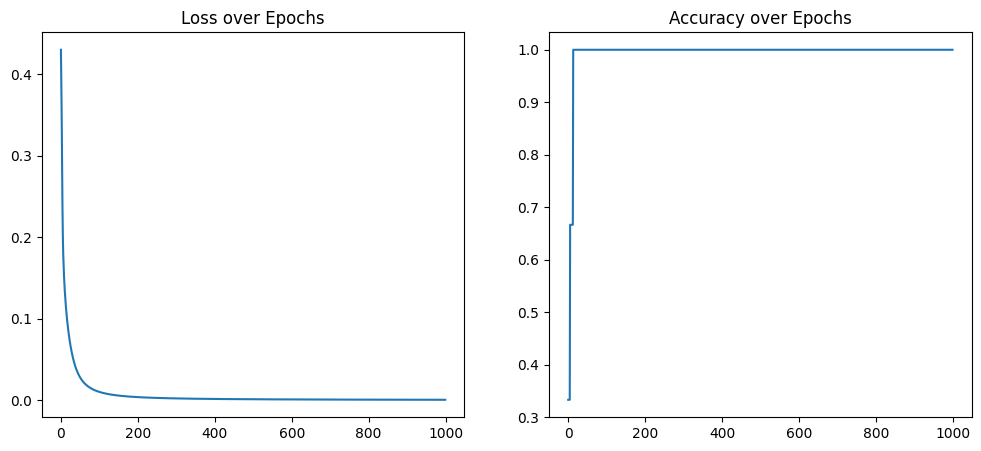

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Accuracy over Epochs")
plt.show()


Image 1 is of letter: A


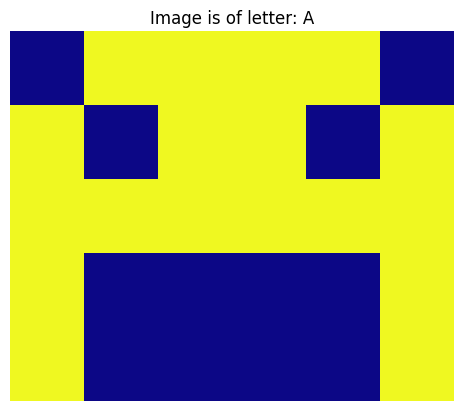

Image 2 is of letter: B


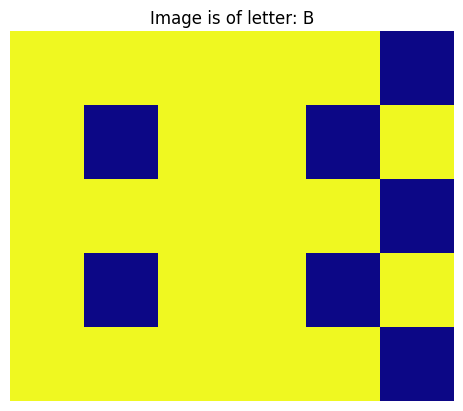

Image 3 is of letter: C


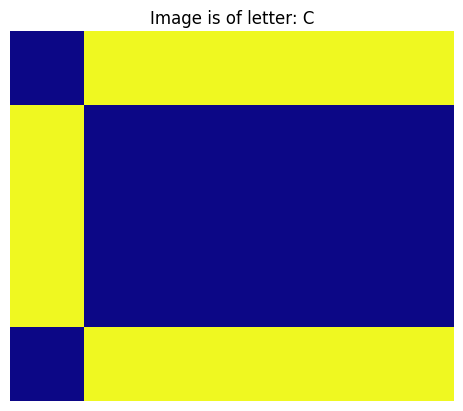

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Define new 5x6 letter matrices
# ----------------------------
A = np.array([
    [0, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1]
])

B = np.array([
    [1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0]
])

C = np.array([
    [0, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1]
])

# ----------------------------
# 2. Prepare data
# ----------------------------
X = np.array([A.flatten(), B.flatten(), C.flatten()])
y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])

# ----------------------------
# 3. Define activation functions
# ----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# ----------------------------
# 4. Initialize network
# ----------------------------
np.random.seed(42)
input_size = 30  # 5x6 = 30
hidden_size = 10
output_size = 3
lr = 0.5
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# ----------------------------
# 5. Train network
# ----------------------------
for epoch in range(epochs):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    loss = np.mean((y - a2) ** 2)

    delta2 = (a2 - y) * sigmoid_derivative(a2)
    delta1 = delta2 @ W2.T * sigmoid_derivative(a1)

    W2 -= lr * a1.T @ delta2
    b2 -= lr * np.sum(delta2, axis=0)
    W1 -= lr * X.T @ delta1
    b1 -= lr * np.sum(delta1, axis=0)

# ----------------------------
# 6. Predict and visualize
# ----------------------------
letters = ['A', 'B', 'C']
test_letters = [A, B, C]

for i, test in enumerate(test_letters):
    test_img = test.flatten().reshape(1, -1)
    z1 = test_img @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    pred = np.argmax(a2)

    print(f"Image {i+1} is of letter: {letters[pred]}")
    plt.imshow(test, cmap='plasma')
    plt.title(f"Image is of letter: {letters[pred]}")
    plt.axis('off')
    plt.show()
